In [83]:
import numpy as np
import pandas as pd
from keras.api.layers import SimpleRNN, GRU, LSTM, Dense
from keras.api.models import Sequential
from keras.api.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.api.backend import epsilon

In [84]:
df = pd.read_csv('hour.csv')

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

X = df.drop('cnt', axis=1).values
y =  df['cnt'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


def create_sequences(X, y, window_size=24):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)


window = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, window)

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, shuffle=False
)

In [85]:
histories = {}

In [86]:
def r2_metric(y_true, y_pred):
    # y_true/y_pred — тензоры спроецированные на шкалу [0,1]
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + epsilon())

In [87]:
def process_model(model: Sequential, name: str) -> tuple:
    results = []
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    print(history.history.keys())
    histories[name] = {
        'val_loss': history.history['val_loss'],
        'val_r2_metric': history.history['val_r2_metric']
    }

    test_mse = model.evaluate(X_test, y_test, verbose=0)

    results.append({
        'Model': name,
        'Test MSE': test_mse,
    })

    return history, results

In [88]:
n_features = X_train.shape[2]
batch_size = 64
epochs = 50
learning_rate = 1e-3

In [93]:
simpleRNN = Sequential(layers=[SimpleRNN(32, input_shape=(window, n_features), name='rnn'), Dense(1, name='output')])
simpleRNN.compile(optimizer=Adam(learning_rate), loss='mse', metrics=[r2_metric])
s_history, s_results = process_model(simpleRNN, 'SimpleRNN')

Epoch 1/50


C:\Users\anzhi\PycharmProjects\tpnn\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0372 - r2_metric: -0.8094 - val_loss: 0.0290 - val_r2_metric: 0.3916
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - r2_metric: 0.4775 - val_loss: 0.0229 - val_r2_metric: 0.5026
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - r2_metric: 0.5788 - val_loss: 0.0183 - val_r2_metric: 0.6097
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - r2_metric: 0.6913 - val_loss: 0.0120 - val_r2_metric: 0.7417
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - r2_metric: 0.7743 - val_loss: 0.0111 - val_r2_metric: 0.7627
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - r2_metric: 0.7900 - val_loss: 0.0091 - val_r2_metric: 0.7996
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - r2_metric: 0.8230 - val_loss: 0.0093 - val_r2_metric: 0.7896
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - r2_metric: 0.8283 - val_loss: 0

In [90]:
gru = Sequential(layers=[GRU(32, input_shape=(window, n_features), name='gru'), Dense(1, name='output')])
gru.compile(optimizer=Adam(learning_rate), loss='mse', metrics=[r2_metric])
gru_history, gru_results = process_model(gru, 'GRU')

Epoch 1/50


C:\Users\anzhi\PycharmProjects\tpnn\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0251 - r2_metric: -0.1951 - val_loss: 0.0320 - val_r2_metric: 0.3356
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - r2_metric: 0.4542 - val_loss: 0.0279 - val_r2_metric: 0.4153
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - r2_metric: 0.4907 - val_loss: 0.0263 - val_r2_metric: 0.4499
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - r2_metric: 0.5192 - val_loss: 0.0247 - val_r2_metric: 0.4791
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - r2_metric: 0.5393 - val_loss: 0.0241 - val_r2_metric: 0.4954
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - r2_metric: 0.5669 - val_loss: 0.0217 - val_r2_metric: 0.5399
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - r2_metric: 0.6118 - val_loss: 0.0160 - val_r2_metric: 0.6501
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - r2_metric: 0.7409 - val_loss: 

In [91]:
lstm = Sequential(layers=[LSTM(32, input_shape=(window, n_features), name='lstm'), Dense(1, name='output')])
lstm.compile(optimizer=Adam(learning_rate), loss='mse', metrics=[r2_metric])
lstm_history, lstm_results = process_model(lstm, 'LSTM')

Epoch 1/50


C:\Users\anzhi\PycharmProjects\tpnn\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0264 - r2_metric: -0.3091 - val_loss: 0.0281 - val_r2_metric: 0.4130
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - r2_metric: 0.5065 - val_loss: 0.0247 - val_r2_metric: 0.4681
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - r2_metric: 0.5466 - val_loss: 0.0229 - val_r2_metric: 0.5011
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - r2_metric: 0.6074 - val_loss: 0.0185 - val_r2_metric: 0.5941
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - r2_metric: 0.7102 - val_loss: 0.0172 - val_r2_metric: 0.6216
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - r2_metric: 0.7594 - val_loss: 0.0113 - val_r2_metric: 0.7455
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - r2_metric: 0.7920 - val_loss: 0.0128 - val_r2_metric: 0.7180
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - r2_metric: 0.8153 - val_loss: 0

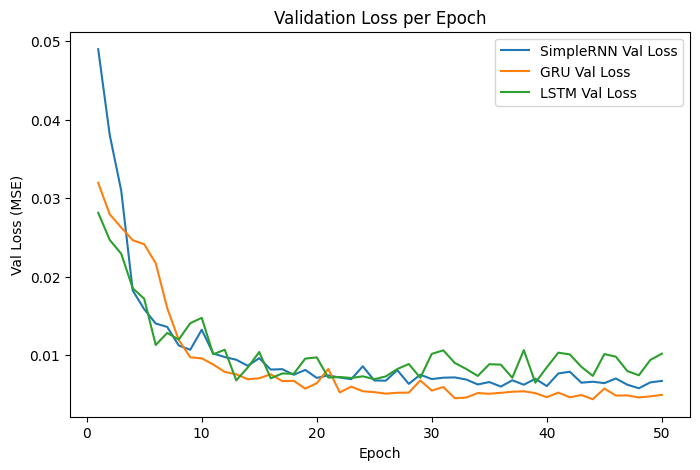

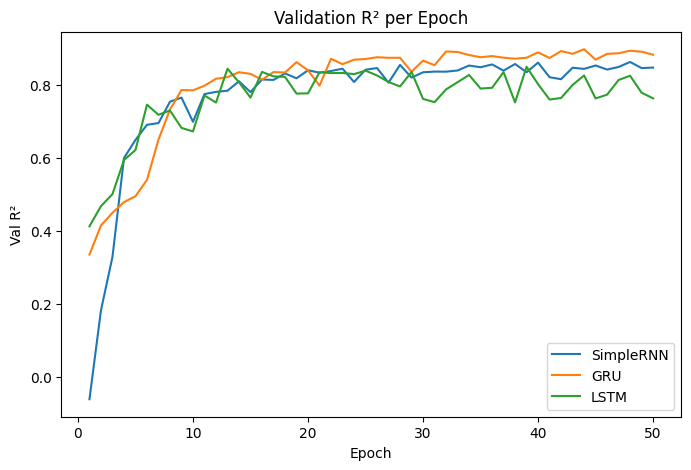

In [92]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5))
for rnn_type, data in histories.items():
    plt.plot(range(1, len(data['val_loss']) + 1), data['val_loss'], label=f"{rnn_type} Val Loss")
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Val Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for name, data in histories.items():
    plt.plot(range(1, len(data['val_r2_metric']) + 1),
             data['val_r2_metric'],
             label=name)
plt.title('Validation R² per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Val R²')
plt.legend()
plt.show()